In [463]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import csv
from io import BytesIO

import seaborn as sns
import warnings
from sklearn import set_config
import matplotlib.pyplot as plt
import missingno as mnso

warnings.filterwarnings('ignore')
plt.style.use('ggplot')

set_config(display='diagram')

In [464]:
df = pd.read_csv('../Data/Multi_County_Data/Multi_Weekly_Weather_Data.csv')
df.head(5)

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,SN01,SN02,SN03,SNOW,SX01,SX02,SX03,TAVG,TMAX,TMIN
0,USR0000GCOO,"ADEL GEORGIA, GA US",31.1097,-83.4269,46.9,2003-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,69.0,51.0
1,USR0000GCOO,"ADEL GEORGIA, GA US",31.1097,-83.4269,46.9,2003-02-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0,72.0,59.0
2,USR0000GCOO,"ADEL GEORGIA, GA US",31.1097,-83.4269,46.9,2003-02-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.0,74.0,60.0
3,USR0000GCOO,"ADEL GEORGIA, GA US",31.1097,-83.4269,46.9,2003-02-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,64.0,44.0
4,USR0000GCOO,"ADEL GEORGIA, GA US",31.1097,-83.4269,46.9,2003-02-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.0,72.0,43.0


In [465]:
df['date'] = pd.to_datetime(df['DATE'])

In [466]:
df.index = df['date']
df = df.sort_index()
df.head(5)

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,SN01,SN02,SN03,SNOW,SX01,SX02,SX03,TAVG,TMAX,TMIN,date
date,,,,,,,,,,,,,,,,,,
2001-01-01,USC00090406,"ASHBURN 3 ENE, GA US",31.70028,-83.62306,132.6,2001-01-01,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,45.0,22.0,2001-01-01
2001-01-01,USC00092361,"CRISP CO POWER DAM, GA US",31.84530,-83.94090,74.7,2001-01-01,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2001-01-01
2001-01-01,USC00098703,"TIFTON, GA US",31.44610,-83.47670,115.8,2001-01-01,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,41.0,23.0,2001-01-01
2001-01-01,USC00096087,"MOULTRIE 2 ESE, GA US",31.17690,-83.74910,103.6,2001-01-01,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,50.0,20.0,2001-01-01
2001-01-02,USC00098703,"TIFTON, GA US",31.44610,-83.47670,115.8,2001-01-02,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,45.0,23.0,2001-01-02


In [467]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 66630 entries, 2001-01-01 to 2022-12-31
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   STATION    66630 non-null  object        
 1   NAME       66630 non-null  object        
 2   LATITUDE   66630 non-null  float64       
 3   LONGITUDE  66630 non-null  float64       
 4   ELEVATION  66630 non-null  float64       
 5   DATE       66630 non-null  object        
 6   PRCP       57503 non-null  float64       
 7   SN01       89 non-null     float64       
 8   SN02       89 non-null     float64       
 9   SN03       89 non-null     float64       
 10  SNOW       42198 non-null  float64       
 11  SX01       89 non-null     float64       
 12  SX02       89 non-null     float64       
 13  SX03       89 non-null     float64       
 14  TAVG       6988 non-null   float64       
 15  TMAX       35271 non-null  float64       
 16  TMIN       35245 non-nu

In [468]:
df.NAME.value_counts()

TIFTON, GA US                7758
MOULTRIE 2 ESE, GA US        7742
CRISP CO POWER DAM, GA US    7729
ADEL GEORGIA, GA US          6988
SYLVESTER 5.5 WSW, GA US     4917
MOULTRIE 6.2 SW, GA US       4399
TIFTON 1.4 ENE, GA US        4172
ASHBURN 3 ENE, GA US         4063
TIFTON 5.5 E, GA US          3197
OCILLA WTP, GA US            2838
MOULTRIE 6.8 E, GA US        2420
TIFTON 2.0 ENE, GA US        1765
MOULTRIE 10.0 ESE, GA US     1652
ADEL 1.9 SSE, GA US          1389
MOULTRIE 7.2 E, GA US        1067
TIFTON 5.6 SW, GA US          820
MOULTRIE 9.1 NW, GA US        614
SYLVESTER 0.2 NE, GA US       561
MOULTRIE 1.4 NNE, GA US       519
TIFTON 5.6 N, GA US           421
MOULTRIE 4.6 SE, GA US        300
SYCAMORE 0.4 ENE, GA US       282
ADEL, GA US                   273
MEIGS 8.3 E, GA US            272
SYLVESTER 1.5 NW, GA US       170
CECIL, GA US                  154
ADEL 7.6 WSW, GA US           148
Name: NAME, dtype: int64

In [469]:
conversion_keys = ['Tift_County',
               'Turner_County',
               'Worth_County',
               'Cook_County',
               'Irwin_County',
               'Colquitt_County']

In [470]:
conversions = dict(zip([i for i in range(len(conversion_keys))], conversion_keys))
locals = {i.split(' ')[0].replace(',', '') for i in list(df.NAME.sort_values().unique())}
convertor = {'ADEL': conversions[3], 'ASHBURN': conversions[1],
             'CECIL': conversions[3],
            'CRISP': conversions[2],
            'MEIGS': conversions[5],
            'MOULTRIE': conversions[5],
            'OCILLA': conversions[4],
            'SYCAMORE': conversions[1],
            'SYLVESTER': conversions[2],
            'TIFTON': conversions[0]}

In [471]:
def county_convertor(x):
    key = x.split(' ')[0].replace(',', '')
    return convertor[key]

df['county'] = df['NAME'].apply(lambda x: county_convertor(x))

In [472]:
df = df.drop(['date'], axis=1)
df.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,SN01,SN02,SN03,SNOW,SX01,SX02,SX03,TAVG,TMAX,TMIN,county
date,,,,,,,,,,,,,,,,,,
2001-01-01,USC00090406,"ASHBURN 3 ENE, GA US",31.70028,-83.62306,132.6,2001-01-01,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,45.0,22.0,Turner_County
2001-01-01,USC00092361,"CRISP CO POWER DAM, GA US",31.84530,-83.94090,74.7,2001-01-01,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Worth_County
2001-01-01,USC00098703,"TIFTON, GA US",31.44610,-83.47670,115.8,2001-01-01,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,41.0,23.0,Tift_County
2001-01-01,USC00096087,"MOULTRIE 2 ESE, GA US",31.17690,-83.74910,103.6,2001-01-01,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,50.0,20.0,Colquitt_County
2001-01-02,USC00098703,"TIFTON, GA US",31.44610,-83.47670,115.8,2001-01-02,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,45.0,23.0,Tift_County


In [473]:
df.county.value_counts()

Colquitt_County    18985
Tift_County        18133
Worth_County       13377
Cook_County         8952
Turner_County       4345
Irwin_County        2838
Name: county, dtype: int64

In [474]:
df = df.drop(['STATION', 'NAME', 'ELEVATION'], axis=1)
df.head(5)

,LATITUDE,LONGITUDE,DATE,PRCP,SN01,SN02,SN03,SNOW,SX01,SX02,SX03,TAVG,TMAX,TMIN,county
date,,,,,,,,,,,,,,,
2001-01-01,31.70028,-83.62306,2001-01-01,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,45.0,22.0,Turner_County
2001-01-01,31.84530,-83.94090,2001-01-01,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Worth_County
2001-01-01,31.44610,-83.47670,2001-01-01,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,41.0,23.0,Tift_County
2001-01-01,31.17690,-83.74910,2001-01-01,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,50.0,20.0,Colquitt_County
2001-01-02,31.44610,-83.47670,2001-01-02,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,45.0,23.0,Tift_County


In [475]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 66630 entries, 2001-01-01 to 2022-12-31
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LATITUDE   66630 non-null  float64
 1   LONGITUDE  66630 non-null  float64
 2   DATE       66630 non-null  object 
 3   PRCP       57503 non-null  float64
 4   SN01       89 non-null     float64
 5   SN02       89 non-null     float64
 6   SN03       89 non-null     float64
 7   SNOW       42198 non-null  float64
 8   SX01       89 non-null     float64
 9   SX02       89 non-null     float64
 10  SX03       89 non-null     float64
 11  TAVG       6988 non-null   float64
 12  TMAX       35271 non-null  float64
 13  TMIN       35245 non-null  float64
 14  county     66630 non-null  object 
dtypes: float64(13), object(2)
memory usage: 8.1+ MB


In [476]:

df

,LATITUDE,LONGITUDE,DATE,PRCP,SN01,SN02,SN03,SNOW,SX01,SX02,SX03,TAVG,TMAX,TMIN,county
date,,,,,,,,,,,,,,,
2001-01-01,31.700280,-83.62306,2001-01-01,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,45.0,22.0,Turner_County
2001-01-01,31.845300,-83.94090,2001-01-01,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Worth_County
2001-01-01,31.446100,-83.47670,2001-01-01,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,41.0,23.0,Tift_County
2001-01-01,31.176900,-83.74910,2001-01-01,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,50.0,20.0,Colquitt_County
2001-01-02,31.446100,-83.47670,2001-01-02,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,45.0,23.0,Tift_County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31,31.184912,-83.75850,2022-12-31,0.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Colquitt_County
2022-12-31,31.115986,-83.85766,2022-12-31,0.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Colquitt_County
2022-12-31,31.530300,-83.83400,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Worth_County


In [477]:
df['PRCP'] = np.round(df['PRCP'], 4)

<AxesSubplot:xlabel='date'>

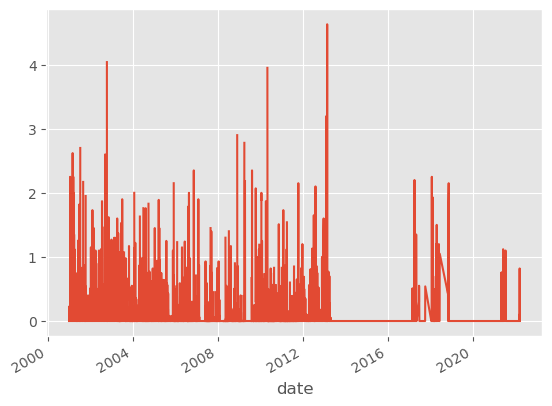

In [478]:
df.query("county == 'Turner_County'")['PRCP'].plot()

<AxesSubplot:xlabel='date'>

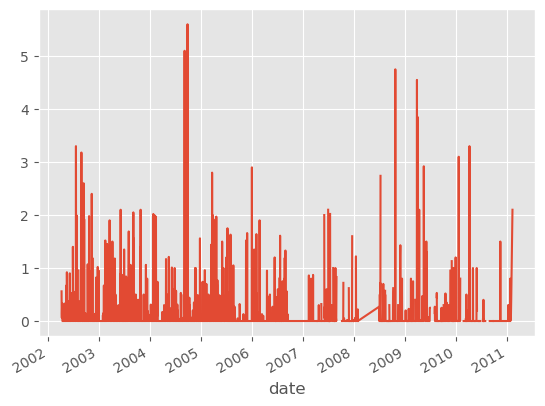

In [479]:
df.query("county == 'Irwin_County'")['PRCP'].plot()

In [480]:
df

,LATITUDE,LONGITUDE,DATE,PRCP,SN01,SN02,SN03,SNOW,SX01,SX02,SX03,TAVG,TMAX,TMIN,county
date,,,,,,,,,,,,,,,
2001-01-01,31.700280,-83.62306,2001-01-01,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,45.0,22.0,Turner_County
2001-01-01,31.845300,-83.94090,2001-01-01,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Worth_County
2001-01-01,31.446100,-83.47670,2001-01-01,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,41.0,23.0,Tift_County
2001-01-01,31.176900,-83.74910,2001-01-01,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,50.0,20.0,Colquitt_County
2001-01-02,31.446100,-83.47670,2001-01-02,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,45.0,23.0,Tift_County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31,31.184912,-83.75850,2022-12-31,0.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Colquitt_County
2022-12-31,31.115986,-83.85766,2022-12-31,0.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Colquitt_County
2022-12-31,31.530300,-83.83400,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Worth_County


In [481]:
print(df.index.min(), df.index.max())

2001-01-01 00:00:00 2022-12-31 00:00:00


In [482]:
df.dtypes

LATITUDE     float64
LONGITUDE    float64
DATE          object
PRCP         float64
SN01         float64
SN02         float64
SN03         float64
SNOW         float64
SX01         float64
SX02         float64
SX03         float64
TAVG         float64
TMAX         float64
TMIN         float64
county        object
dtype: object

In [483]:
df['PRCP'] = np.round(df['PRCP'], 4)
df['PRCP'] = df['PRCP'].astype('float64')
df['DATE'] = pd.to_datetime(df['DATE'])

In [484]:
df.county.value_counts()

Colquitt_County    18985
Tift_County        18133
Worth_County       13377
Cook_County         8952
Turner_County       4345
Irwin_County        2838
Name: county, dtype: int64

In [485]:
avg_df = df.groupby(['county', 'DATE']).mean()

In [486]:
squished_df = avg_df.reset_index(level='county')
squished_df = squished_df.sort_index()
squished_df.head(5)
df = squished_df

In [487]:
df.columns

Index(['county', 'LATITUDE', 'LONGITUDE', 'PRCP', 'SN01', 'SN02', 'SN03',
       'SNOW', 'SX01', 'SX02', 'SX03', 'TAVG', 'TMAX', 'TMIN'],
      dtype='object')

In [488]:
[i for i in df.county.unique()]

['Colquitt_County',
 'Worth_County',
 'Tift_County',
 'Turner_County',
 'Cook_County',
 'Irwin_County']

In [489]:
cols = ['date', 'county', 'LATITUDE', 'LONGITUDE', 'PRCP', 'SN01', 'SN02', 'SN03',
       'SNOW', 'SX01', 'SX02', 'SX03', 'TAVG', 'TMAX', 'TMIN']
index = pd.date_range(start='2001-01-01', end='2022-12-31', freq='D')


county_full_time_frames = []
counties = [j for j in df.county.unique()]
for i in counties:
    print('Creating Dataframe for County: ', i)
    temp_df = pd.DataFrame(columns=cols, index=index)
    existing_data = df.query(f"county == '{i}'")
    existing_data['date'] = existing_data.index
    temp_df.loc[existing_data['date'], existing_data.columns] = existing_data
    temp_df.fillna(value=pd.np.nan, inplace=True)
    temp_df['county'] = f"{i}"
    temp_df.date = temp_df.index
    county_full_time_frames.append(temp_df)


Creating Dataframe for County:  Colquitt_County
Creating Dataframe for County:  Worth_County
Creating Dataframe for County:  Tift_County
Creating Dataframe for County:  Turner_County
Creating Dataframe for County:  Cook_County
Creating Dataframe for County:  Irwin_County


In [490]:
county_full_time_frames[5]

,date,county,LATITUDE,LONGITUDE,PRCP,SN01,SN02,SN03,SNOW,SX01,SX02,SX03,TAVG,TMAX,TMIN
2001-01-01,2001-01-01,Irwin_County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-02,2001-01-02,Irwin_County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-03,2001-01-03,Irwin_County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-04,2001-01-04,Irwin_County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-05,2001-01-05,Irwin_County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,2022-12-27,Irwin_County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-28,2022-12-28,Irwin_County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-29,2022-12-29,Irwin_County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-30,2022-12-30,Irwin_County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [491]:
df_cat = pd.concat(county_full_time_frames)


In [492]:
df = df_cat.reset_index()

In [493]:
df.county.value_counts()

Colquitt_County    8035
Worth_County       8035
Tift_County        8035
Turner_County      8035
Cook_County        8035
Irwin_County       8035
Name: county, dtype: int64

In [494]:
df.head()

,index,date,county,LATITUDE,LONGITUDE,PRCP,SN01,SN02,SN03,SNOW,SX01,SX02,SX03,TAVG,TMAX,TMIN
0,2001-01-01,2001-01-01,Colquitt_County,31.1769,-83.7491,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,50.0,20.0
1,2001-01-02,2001-01-02,Colquitt_County,31.1769,-83.7491,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,42.0,23.0
2,2001-01-03,2001-01-03,Colquitt_County,31.1769,-83.7491,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,42.0,21.0
3,2001-01-04,2001-01-04,Colquitt_County,31.1769,-83.7491,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,49.0,24.0
4,2001-01-05,2001-01-05,Colquitt_County,31.1769,-83.7491,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,60.0,28.0


In [495]:
df = df.drop(['index'], axis=1)

In [496]:
df['date'] = pd.to_datetime(df['date'])
df.index = df['date']
df = df.sort_index()
df.head()

,date,county,LATITUDE,LONGITUDE,PRCP,SN01,SN02,SN03,SNOW,SX01,SX02,SX03,TAVG,TMAX,TMIN
date,,,,,,,,,,,,,,,
2001-01-01,2001-01-01,Colquitt_County,31.17690,-83.74910,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,50.0,20.0
2001-01-01,2001-01-01,Cook_County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-01,2001-01-01,Turner_County,31.70028,-83.62306,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,45.0,22.0
2001-01-01,2001-01-01,Tift_County,31.44610,-83.47670,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,41.0,23.0
2001-01-01,2001-01-01,Worth_County,31.84530,-83.94090,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [497]:
df = df.drop(['date'], axis=1)
df.head()

,county,LATITUDE,LONGITUDE,PRCP,SN01,SN02,SN03,SNOW,SX01,SX02,SX03,TAVG,TMAX,TMIN
date,,,,,,,,,,,,,,
2001-01-01,Colquitt_County,31.17690,-83.74910,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,50.0,20.0
2001-01-01,Cook_County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-01,Turner_County,31.70028,-83.62306,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,45.0,22.0
2001-01-01,Tift_County,31.44610,-83.47670,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,41.0,23.0
2001-01-01,Worth_County,31.84530,-83.94090,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [498]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48210 entries, 2001-01-01 to 2022-12-31
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   county     48210 non-null  object 
 1   LATITUDE   38643 non-null  float64
 2   LONGITUDE  38643 non-null  float64
 3   PRCP       31778 non-null  float64
 4   SN01       89 non-null     float64
 5   SN02       89 non-null     float64
 6   SN03       89 non-null     float64
 7   SNOW       29702 non-null  float64
 8   SX01       89 non-null     float64
 9   SX02       89 non-null     float64
 10  SX03       89 non-null     float64
 11  TAVG       6988 non-null   float64
 12  TMAX       35196 non-null  float64
 13  TMIN       35170 non-null  float64
dtypes: float64(13), object(1)
memory usage: 5.5+ MB


In [499]:
df['DATE'] = df.index

In [500]:
df.index = pd.to_datetime(df.index)

In [501]:
df = df.drop(['SN01','SN02','SN03', 'SX01','SX02','SX03','LATITUDE','LONGITUDE', 'SNOW'], axis=1)
df['TMAX'] = df['TMAX'].interpolate()
df['TMIN'] = df['TMIN'].interpolate()
df['TAVG'] = (df['TMAX'] + df['TMIN'])/2
df['TAVG'] = np.round(df['TAVG'], 4)

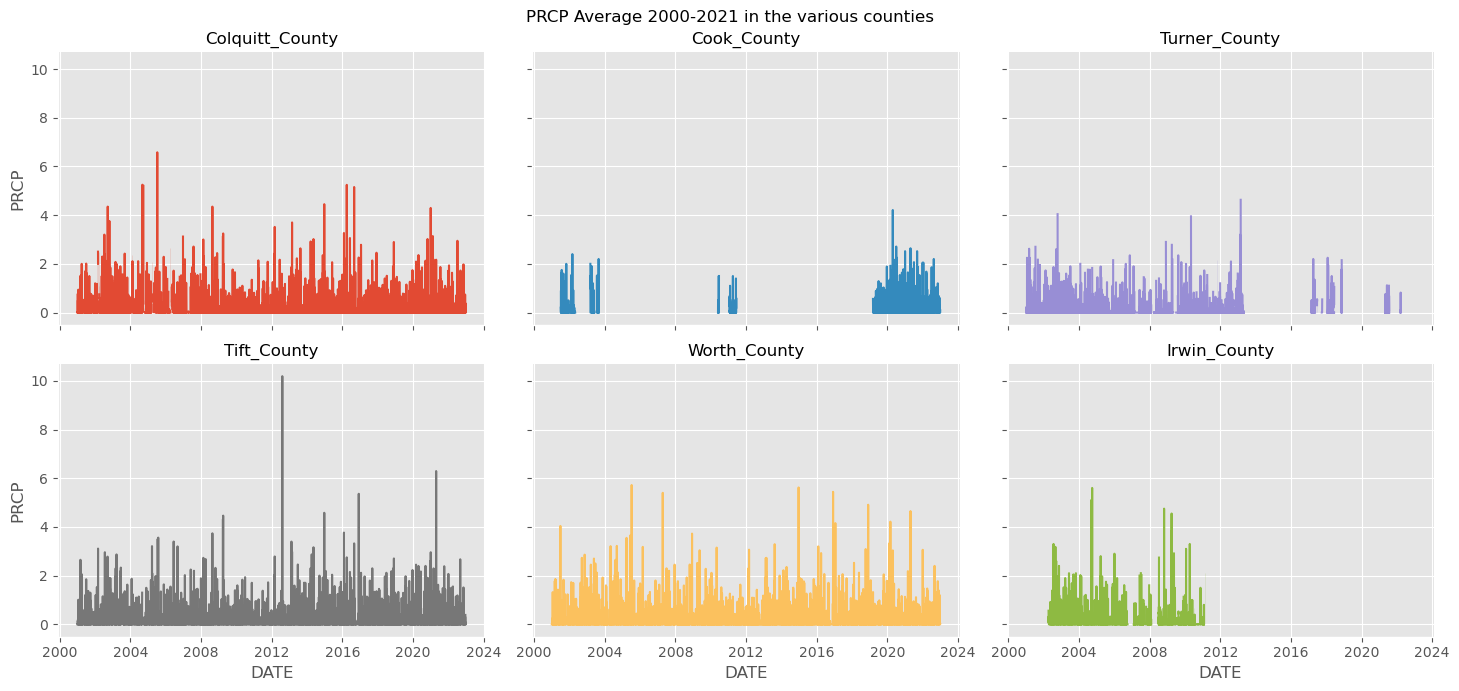

In [502]:
g = sns.FacetGrid(df, col='county', col_wrap=3, hue='county', height=3.5, aspect=1.4)
g =g.map(plt.plot,'DATE','PRCP')
g = g.map(plt.fill_between,'DATE','PRCP', alpha=0.2).set_titles("{col_name}")
g = g.set_titles("{col_name}")
plt.subplots_adjust(top=0.92)
g = g.fig.suptitle('PRCP Average 2000-2021 in the various counties')
plt.show()

<AxesSubplot:>

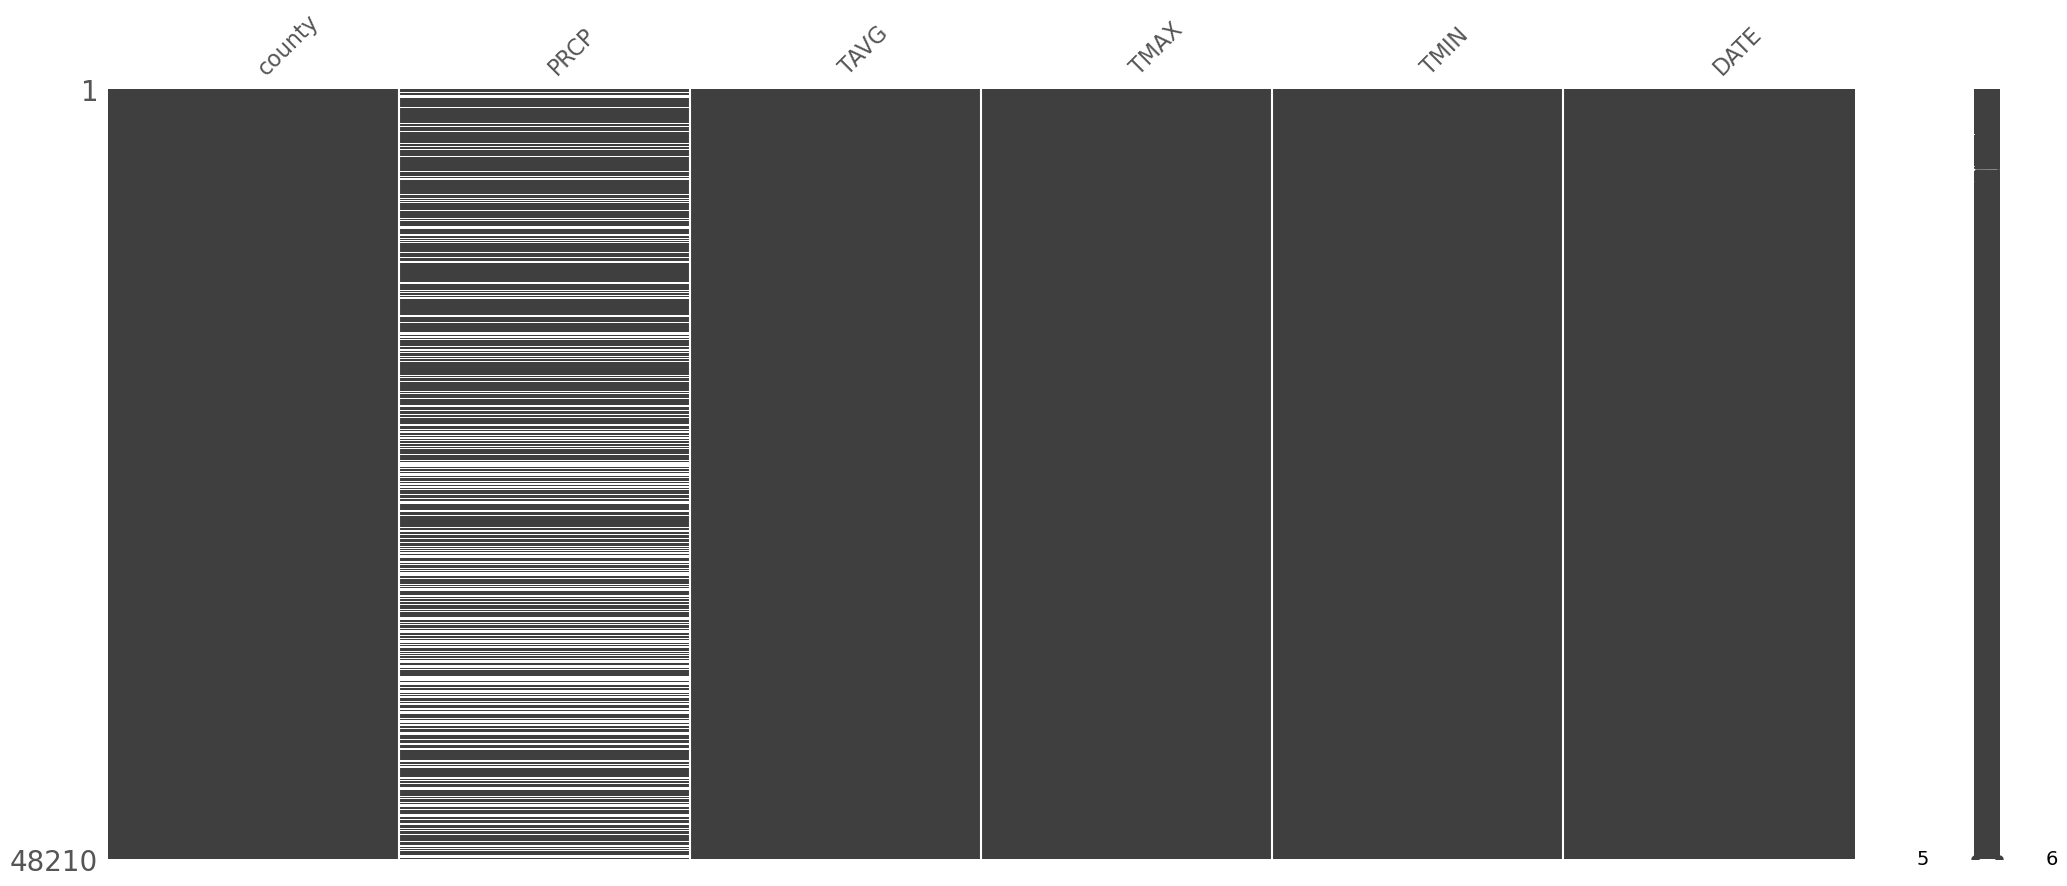

In [503]:
mnso.matrix(df)

In [504]:
df.isnull().sum().sum()

16432

In [505]:
df.groupby(['county']).apply(lambda x: x.isna().sum())

,county,PRCP,TAVG,TMAX,TMIN,DATE
county,,,,,,
Colquitt_County,0,338,0,0,0,0
Cook_County,0,6130,0,0,0,0
Irwin_County,0,5487,0,0,0,0
Tift_County,0,87,0,0,0,0
Turner_County,0,4332,0,0,0,0
Worth_County,0,58,0,0,0,0


In [506]:
type(df)
df = df.copy()
df.head()

,county,PRCP,TAVG,TMAX,TMIN,DATE
date,,,,,,
2001-01-01,Colquitt_County,0.0,35.00,50.0,20.0,2001-01-01
2001-01-01,Cook_County,NaN,34.25,47.5,21.0,2001-01-01
2001-01-01,Turner_County,0.0,33.50,45.0,22.0,2001-01-01
2001-01-01,Tift_County,0.0,32.00,41.0,23.0,2001-01-01
2001-01-01,Worth_County,0.0,32.10,41.6,22.6,2001-01-01


In [507]:
grouped = df.groupby(['DATE'])
df[['PRCP']] = grouped[['PRCP']].transform(lambda x: x.fillna(x.mean()))


In [508]:
df.head()

,county,PRCP,TAVG,TMAX,TMIN,DATE
date,,,,,,
2001-01-01,Colquitt_County,0.0,35.00,50.0,20.0,2001-01-01
2001-01-01,Cook_County,0.0,34.25,47.5,21.0,2001-01-01
2001-01-01,Turner_County,0.0,33.50,45.0,22.0,2001-01-01
2001-01-01,Tift_County,0.0,32.00,41.0,23.0,2001-01-01
2001-01-01,Worth_County,0.0,32.10,41.6,22.6,2001-01-01


CPU times: user 119 ms, sys: 20.1 ms, total: 139 ms
Wall time: 138 ms


<AxesSubplot:>

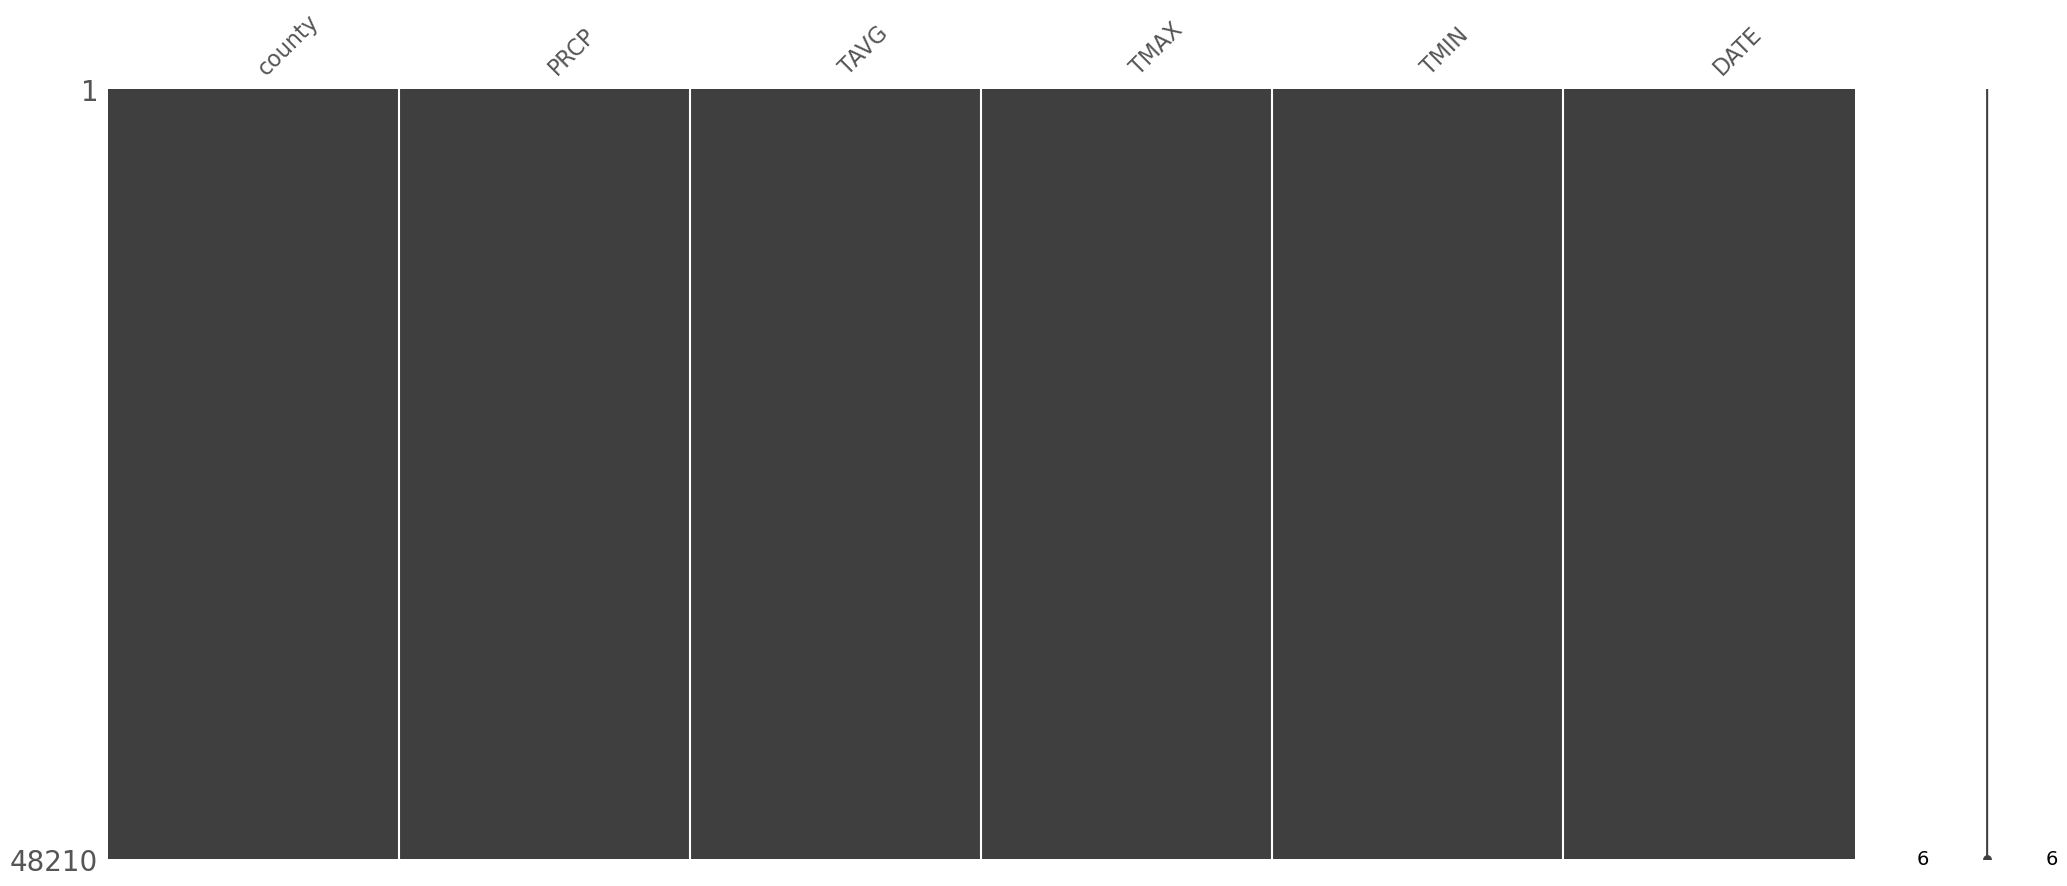

In [509]:
%%time
mnso.matrix(df)

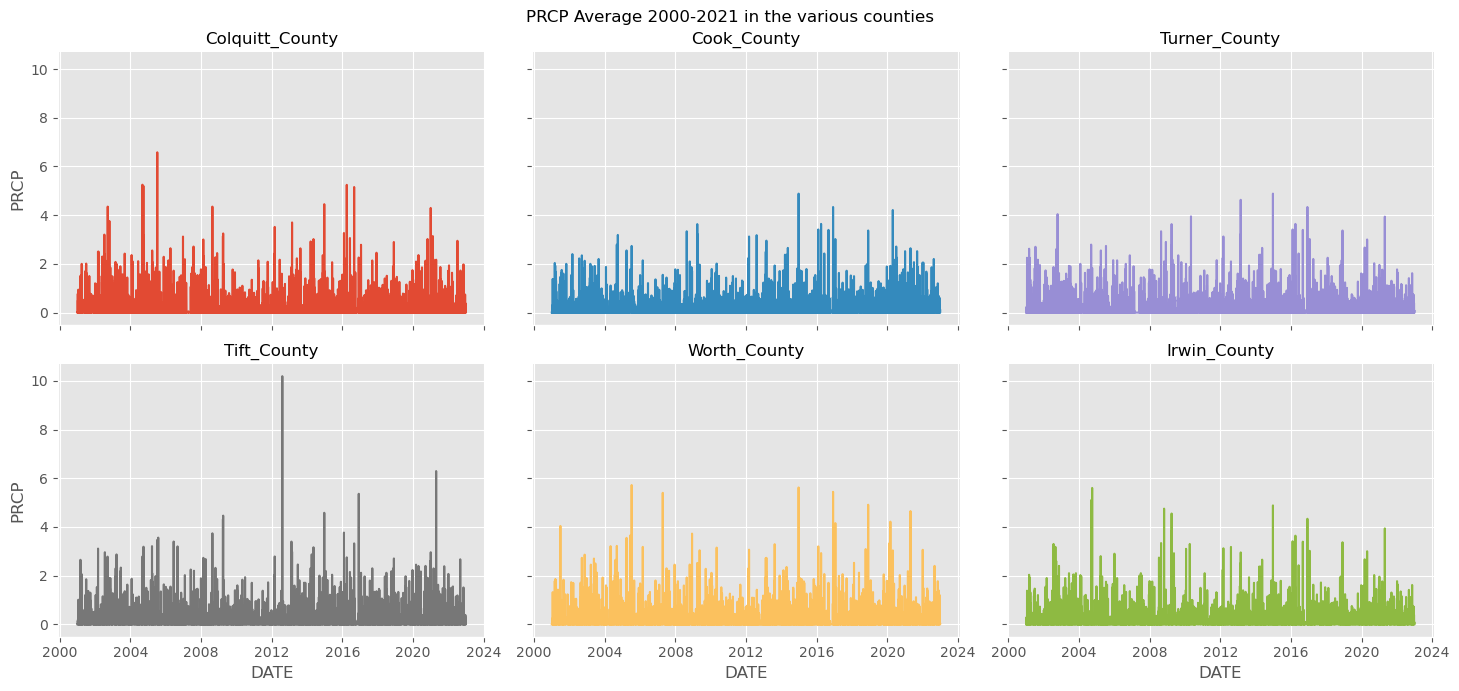

In [510]:
g = sns.FacetGrid(df, col='county', col_wrap=3, hue='county', height=3.5, aspect=1.4)
g =g.map(plt.plot,'DATE','PRCP')
g = g.map(plt.fill_between,'DATE','PRCP', alpha=0.2).set_titles("{col_name}")
g = g.set_titles("{col_name}")
plt.subplots_adjust(top=0.92)
g = g.fig.suptitle('PRCP Average 2000-2021 in the various counties')
plt.show()

In [513]:
df.isnull().sum(axis=0)

county    0
PRCP      0
TAVG      0
TMAX      0
TMIN      0
DATE      0
dtype: int64

In [546]:
# Combine by week now
df_weekly = df.groupby(['county']).resample('W').mean()
df_weekly

PRCP       TAVG       TMAX       TMIN
county          date                                                 
Colquitt_County 2001-01-07  0.000000  38.857143  52.857143  24.857143
                2001-01-14  0.181429  45.928571  59.428571  32.428571
                2001-01-21  0.134286  54.428571  66.285714  42.571429
                2001-01-28  0.000000  44.357143  58.857143  29.857143
                2001-02-04  0.080000  53.785714  62.714286  44.857143
...                              ...        ...        ...        ...
Worth_County    2022-12-04  0.208571  57.142857  70.285714  44.000000
                2022-12-11  0.000714  63.500000  71.714286  55.285714
                2022-12-18  0.202143  53.285714  61.857143  44.714286
                2022-12-25  0.116667  37.500000  46.142857  28.857143
                2023-01-01  0.003333  42.500000  55.333333  29.666667

[6888 rows x 4 columns]

In [547]:
df_weekly = df_weekly.reset_index(level='county')
df_weekly.head()

,county,PRCP,TAVG,TMAX,TMIN
date,,,,,
2001-01-07,Colquitt_County,0.000000,38.857143,52.857143,24.857143
2001-01-14,Colquitt_County,0.181429,45.928571,59.428571,32.428571
2001-01-21,Colquitt_County,0.134286,54.428571,66.285714,42.571429
2001-01-28,Colquitt_County,0.000000,44.357143,58.857143,29.857143
2001-02-04,Colquitt_County,0.080000,53.785714,62.714286,44.857143


In [548]:
df_weekly = df_weekly.sort_index()
df_weekly

,county,PRCP,TAVG,TMAX,TMIN
date,,,,,
2001-01-07,Colquitt_County,0.000000,38.857143,52.857143,24.857143
2001-01-07,Cook_County,0.000000,36.333329,47.869048,24.797619
2001-01-07,Tift_County,0.000000,34.857143,46.428571,23.285714
2001-01-07,Turner_County,0.000000,35.857143,46.714286,25.000000
2001-01-07,Irwin_County,0.000000,35.800000,47.621429,23.978571
...,...,...,...,...,...
2023-01-01,Tift_County,0.003333,44.522233,58.616667,30.427778
2023-01-01,Cook_County,0.015000,50.833333,66.833333,34.833333
2023-01-01,Colquitt_County,0.019444,45.962500,59.975000,31.950000


In [555]:
dsci_df = pd.read_parquet('../Data/Drought_Monitor_DSCI_Datasets/Multi_County_DSCI_2000_2021.parquet')
dsci_df

,county,DSCI,quarter,month,year,dayofyear,dayofmonth,date_offset,week,season,lag1,lag2,lag3
date,,,,,,,,,,,,,
2000-01-04,Tift_County,300,1,1,2000,4,4,1084,1,Winter,NaN,NaN,NaN
2000-01-04,Turner_County,300,1,1,2000,4,4,1084,1,Winter,NaN,NaN,NaN
2000-01-04,Worth_County,300,1,1,2000,4,4,1084,1,Winter,NaN,NaN,NaN
2000-01-04,Cook_County,300,1,1,2000,4,4,1084,1,Winter,NaN,NaN,NaN
2000-01-04,Irwin_County,300,1,1,2000,4,4,1084,1,Winter,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,Colquitt_County,200,4,12,2022,361,27,907,52,Winter,100.0,45.0,0.0
2022-12-27,Irwin_County,148,4,12,2022,361,27,907,52,Winter,100.0,45.0,0.0
2022-12-27,Tift_County,200,4,12,2022,361,27,907,52,Winter,100.0,45.0,0.0


In [550]:
df_new_weekly =  df_weekly.set_index(df_weekly.index - pd.DateOffset(days=3))
df_new_weekly.head()

,county,PRCP,TAVG,TMAX,TMIN
date,,,,,
2001-01-04,Colquitt_County,0.0,38.857143,52.857143,24.857143
2001-01-04,Cook_County,0.0,36.333329,47.869048,24.797619
2001-01-04,Tift_County,0.0,34.857143,46.428571,23.285714
2001-01-04,Turner_County,0.0,35.857143,46.714286,25.000000
2001-01-04,Irwin_County,0.0,35.800000,47.621429,23.978571


In [526]:
dsci_df.head()

,county,DSCI,quarter,month,year,dayofyear,dayofmonth,date_offset,week,season,lag1,lag2,lag3
date,,,,,,,,,,,,,
2000-01-04,Tift_County,300,1,1,2000,4,4,1084,1,Winter,NaN,NaN,NaN
2000-01-04,Turner_County,300,1,1,2000,4,4,1084,1,Winter,NaN,NaN,NaN
2000-01-04,Worth_County,300,1,1,2000,4,4,1084,1,Winter,NaN,NaN,NaN
2000-01-04,Cook_County,300,1,1,2000,4,4,1084,1,Winter,NaN,NaN,NaN
2000-01-04,Irwin_County,300,1,1,2000,4,4,1084,1,Winter,NaN,NaN,NaN


In [556]:
dsci_df = dsci_df[dsci_df.index >= pd.to_datetime('2001-01-01')]
dsci_df.head()

,county,DSCI,quarter,month,year,dayofyear,dayofmonth,date_offset,week,season,lag1,lag2,lag3
date,,,,,,,,,,,,,
2001-01-02,Colquitt_County,184,1,1,2001,2,2,1082,1,Winter,300.0,NaN,NaN
2001-01-02,Cook_County,100,1,1,2001,2,2,1082,1,Winter,300.0,NaN,NaN
2001-01-02,Worth_County,200,1,1,2001,2,2,1082,1,Winter,300.0,NaN,NaN
2001-01-02,Tift_County,144,1,1,2001,2,2,1082,1,Winter,300.0,NaN,NaN
2001-01-02,Irwin_County,155,1,1,2001,2,2,1082,1,Winter,300.0,NaN,NaN


In [557]:
dsci_df =  dsci_df.set_index(dsci_df.index + pd.DateOffset(days=2))
dsci_df.head()

,county,DSCI,quarter,month,year,dayofyear,dayofmonth,date_offset,week,season,lag1,lag2,lag3
date,,,,,,,,,,,,,
2001-01-04,Colquitt_County,184,1,1,2001,2,2,1082,1,Winter,300.0,NaN,NaN
2001-01-04,Cook_County,100,1,1,2001,2,2,1082,1,Winter,300.0,NaN,NaN
2001-01-04,Worth_County,200,1,1,2001,2,2,1082,1,Winter,300.0,NaN,NaN
2001-01-04,Tift_County,144,1,1,2001,2,2,1082,1,Winter,300.0,NaN,NaN
2001-01-04,Irwin_County,155,1,1,2001,2,2,1082,1,Winter,300.0,NaN,NaN


In [558]:
dsci_df = dsci_df.drop(['lag1', 'lag2','lag3'], axis=1)

In [569]:
dsci_df = dsci_df.merge(df_new_weekly, on=['date','county'], how='left')

In [570]:
df = dsci_df.copy()


In [571]:
dscis = df['DSCI']
df = df.drop(['DSCI'],axis=1)
df['DSCI'] = dscis
df.head()

,county,quarter,month,year,dayofyear,dayofmonth,date_offset,week,season,PRCP,TAVG,TMAX,TMIN,DSCI
date,,,,,,,,,,,,,,
2001-01-04,Colquitt_County,1,1,2001,2,2,1082,1,Winter,0.0,38.857143,52.857143,24.857143,184
2001-01-04,Cook_County,1,1,2001,2,2,1082,1,Winter,0.0,36.333329,47.869048,24.797619,100
2001-01-04,Worth_County,1,1,2001,2,2,1082,1,Winter,0.0,36.152386,47.866667,24.438095,200
2001-01-04,Tift_County,1,1,2001,2,2,1082,1,Winter,0.0,34.857143,46.428571,23.285714,144
2001-01-04,Irwin_County,1,1,2001,2,2,1082,1,Winter,0.0,35.800000,47.621429,23.978571,155


In [572]:
df.to_parquet('../Data/Multi_County_Data/Mutli_County_Weather_And_DSCI')